# Install Kaggle

In [1]:
!pip install -q kaggle

# Upload Kaggle Credential API Token

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


# Credential API Verification

In [3]:
!chmod 600 /content/kaggle.json #nama file kaggle yang didownload dan sudah diupload tadi

# Download Data

In [4]:
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
#! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d nama user/nama datasetnya contoh bisa dicek dibawah
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d ananthr1/weather-prediction

  0% 0.00/11.5k [00:00<?, ?B/s]
100% 11.5k/11.5k [00:00<00:00, 28.4MB/s]


#EKSTRAK DATA

In [5]:
import zipfile

local_zip = '/content/weather-prediction.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# SILAHKAN KERJAKAN DIBAWAH SINI

In [6]:
import zipfile, math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from google.colab import files



In [7]:
weather_Data = pd.read_csv('seattle-weather.csv')

In [8]:
weather_Data.sort_values(by=['date'], inplace=True, ascending=True)


In [9]:
weather_Data.set_index('date', inplace= True)


In [10]:
weather_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [11]:
weather_Data.drop(['precipitation','wind','weather'],axis=1,inplace=True)


In [12]:
weather_Data['temp_Average'] = (weather_Data['temp_max'] + weather_Data['temp_min']) / 2


In [13]:
weather_Data.describe()


,temp_max,temp_min,temp_Average
count,1461.000000,1461.000000,1461.000000
mean,16.439083,8.234771,12.336927
std,7.349758,5.023004,5.998051
min,-1.600000,-7.100000,-3.800000
25%,10.600000,4.400000,7.750000
50%,15.600000,8.300000,11.950000
75%,22.200000,12.200000,17.200000
max,35.600000,18.300000,26.700000


In [14]:
weather_Data['Temp_Next_Day']=weather_Data['temp_Average'].shift(-1)


In [15]:
weather_Data.head()


,temp_max,temp_min,temp_Average,Temp_Next_Day
date,,,,
2012-01-01,12.8,5.0,8.90,6.70
2012-01-02,10.6,2.8,6.70,9.45
2012-01-03,11.7,7.2,9.45,8.90
2012-01-04,12.2,5.6,8.90,5.85
2012-01-05,8.9,2.8,5.85,3.30


In [16]:
weather_Data.isnull().sum()

temp_max         0
temp_min         0
temp_Average     0
Temp_Next_Day    1
dtype: int64

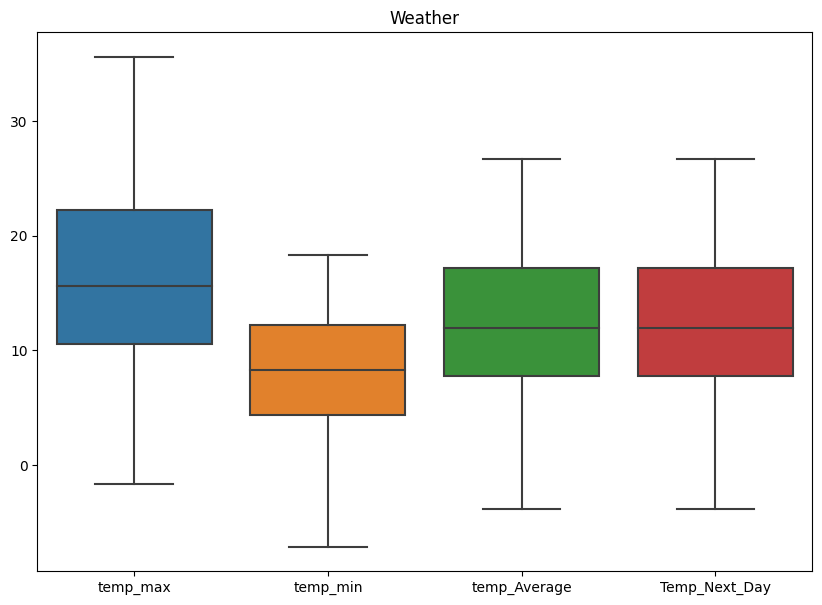

In [20]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=weather_Data).set_title("Weather")
plt.show()


In [18]:
Q1 = weather_Data.quantile(0.25)
Q3 = weather_Data.quantile(0.75)
IQR = Q3-Q1
weather_Data=weather_Data[~((weather_Data<(Q1-1.5*IQR))|(weather_Data>(Q3+1.5*IQR))).any(axis=1)]

weather_Data.shape


(1461, 4)

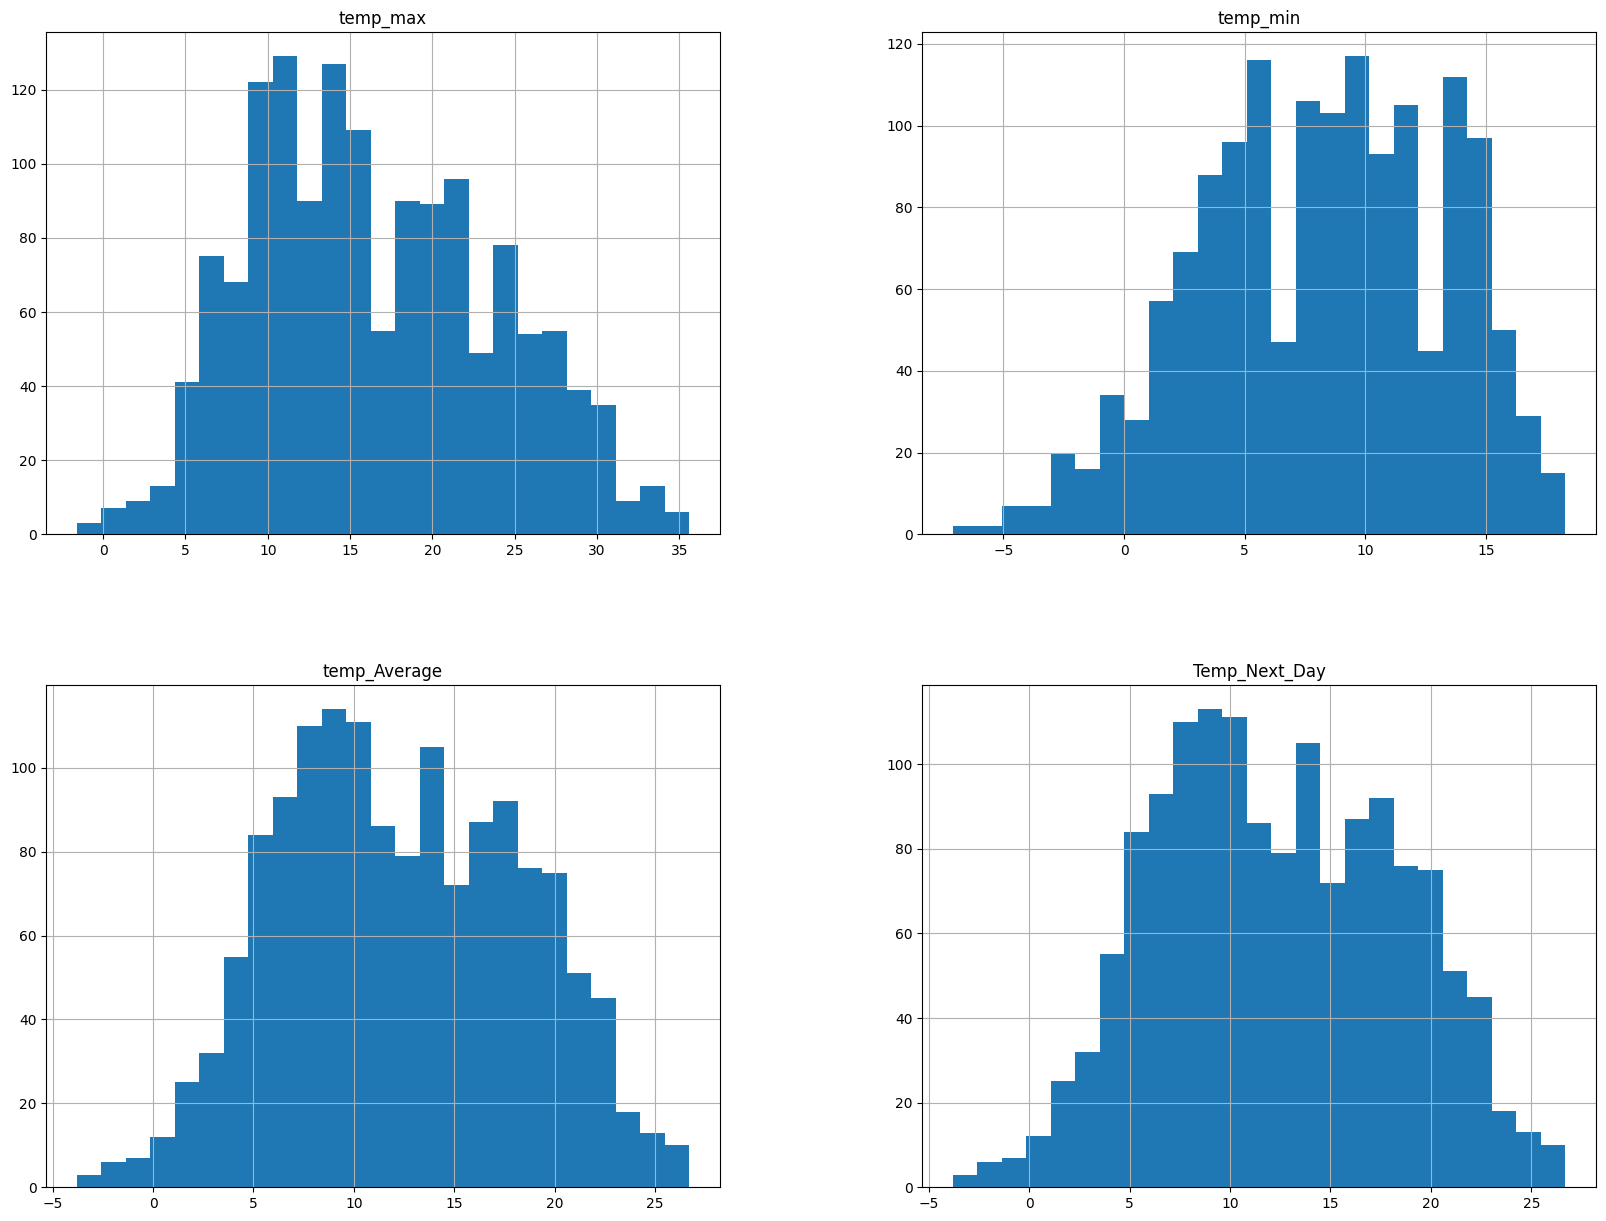

In [19]:
weather_Data.hist(bins=25, figsize=(20,15))
plt.show()



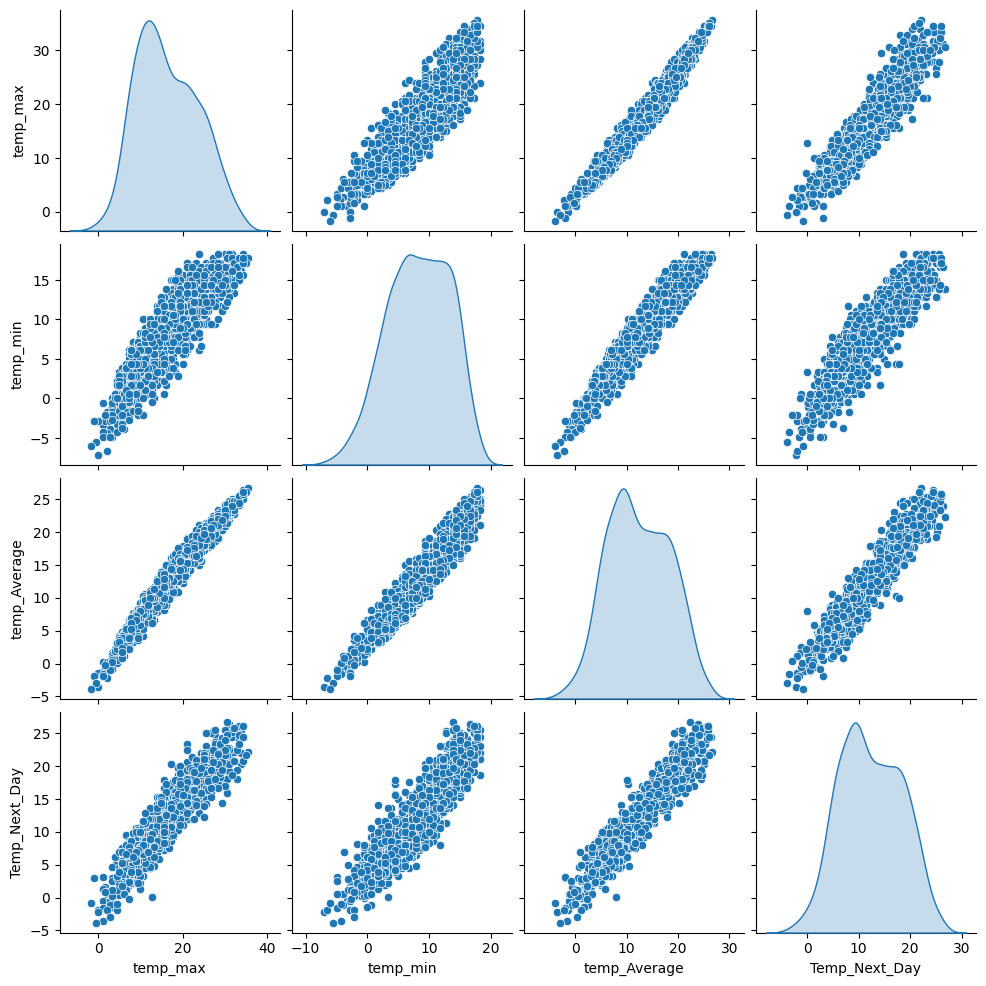

In [ ]:
sns.pairplot(weather_Data, diag_kind = 'kde')


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

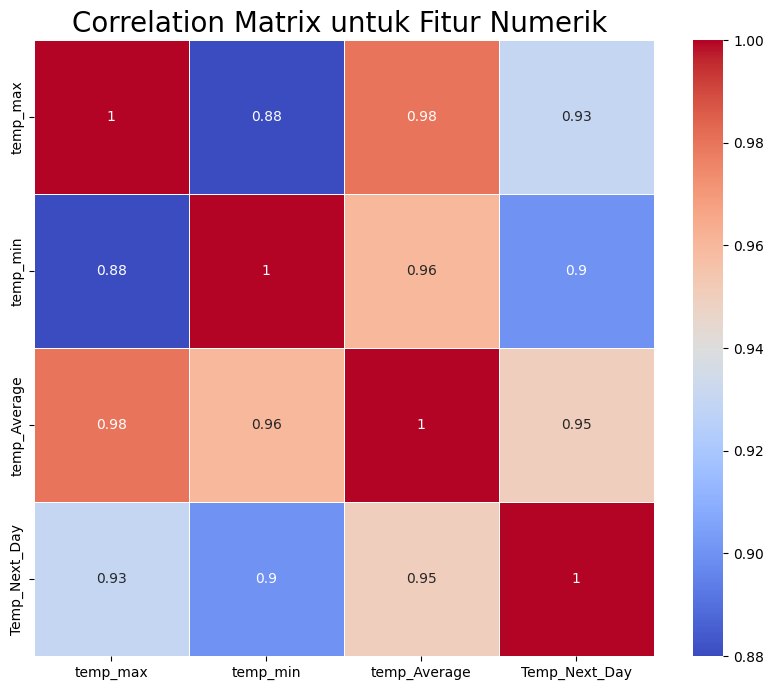

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = weather_Data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


In [ ]:

weather_Data.dropna(inplace=True)
X = weather_Data.drop('Temp_Next_Day',axis=1)

X = preprocessing.scale(X)
y = weather_Data['Temp_Next_Day']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 1460
Total # of sample in train dataset: 1168
Total # of sample in test dataset: 292


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])



In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)


In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)



In [ ]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)



In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse


,train,test
KNN,0.003113,0.004308
RF,0.001712,0.00498
Boosting,0.003532,0.004466


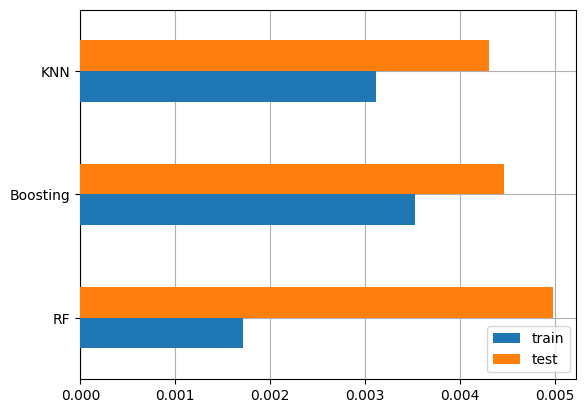

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


In [ ]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100


In [ ]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi


,Accuracy (%)
K-Nearest Neighbor,87.529353
Random Forest,85.583853
Boosting,87.072514


In [ ]:
X_30=X[:30]
X_30
forecast=knn.predict(X_30)


In [ ]:
df1=pd.DataFrame(forecast,columns=['Temp_Next_Day'])
df1=weather_Data.append(df1)
df1.drop(['temp_max', 'temp_min', 'temp_Average'],axis=1,inplace=True)



<ipython-input-105-fe2ab4101f0c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=weather_Data.append(df1)


In [ ]:
df1.tail(35)


,Temp_Next_Day
2015-12-26,3.050
2015-12-27,3.350
2015-12-28,3.900
2015-12-29,2.300
2015-12-30,1.750
0,9.130
1,6.660
2,8.445
3,8.200
4,5.885


In [ ]:
weather_Data

,temp_max,temp_min,temp_Average,Temp_Next_Day
date,,,,
2012-01-02,10.6,2.8,6.70,8.90
2012-01-03,11.7,7.2,9.45,6.70
2012-01-04,12.2,5.6,8.90,9.45
2012-01-05,8.9,2.8,5.85,8.90
2012-01-06,4.4,2.2,3.30,5.85
...,...,...,...,...
2015-12-27,4.4,1.7,3.05,2.20
2015-12-28,5.0,1.7,3.35,3.05
2015-12-29,7.2,0.6,3.90,3.35
